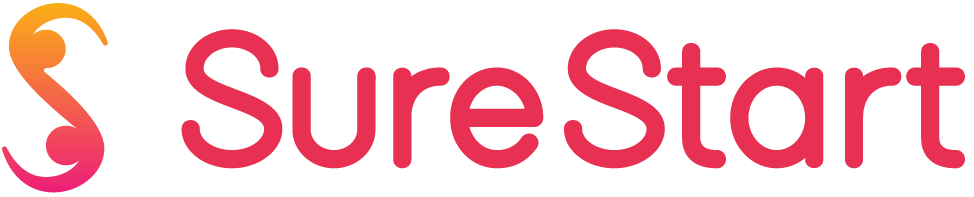

# Building AI-Powered Web Applications with Streamlit

## Introduction
Imagine you're a product manager at a tech startup, and your team has just discovered an amazing collection of AI models that could revolutionize how users interact with your products. The challenge? These powerful AI capabilities are trapped in complex code that regular users can't access. Your mission is to build user-friendly web applications that make these AI capabilities accessible to everyone.

In our previous lesson, we explored the vast possibilities of Hugging Face's transformers library, discovering how AI models can:
- Analyze sentiment in text.
- Answer questions about complex topics.
- Generate creative writing.
- Translate between languages.
- Summarize long documents.
- Complete unfinished text.

Today, we'll learn how to transform these AI capabilities into interactive web applications that anyone can use, regardless of their technical expertise.

## Learning Objectives
By the end of this lesson, you will be able to:
1. Set up a secure development environment using ngrok and Streamlit.
2. Create interactive web interfaces for AI models.
3. Design user-friendly input mechanisms for AI applications.
4. Display AI results in an engaging and intuitive way.
5. Deploy a fully functional AI-powered web application.

### 📦 Let's Get Our Tools Ready!


In [1]:
import sys

!{sys.executable} -m pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.7 MB/s eta 0:00:00


Now let's tell Python about your ngrok key:

**Save Your Key Using the Secrets Icon**  
   - In the left-hand sidebar of your environment, look for the **secrets icon** (key icon).  
   - Click on it and add a new secret with the key name `NGROK_AUTH_TOKEN`.  
   - Paste your authtoken as the value and save it securely.



In [7]:
from pyngrok import ngrok
from google.colab import userdata
import os

# Update the Secrets section in the left sidebar with the token you copied
ngrok.set_auth_token(userdata.get('NGROK_AUTH_TOKEN'))

Run the following code below to initialize the run_streamlit function:

In [3]:
def run_streamlit():
    # Kill any running Streamlit instances
    !killall ngrok
    os.system("fuser -k 8501/tcp")

    # Run the Streamlit app
    os.system("streamlit run app.py &>/dev/null&")

    # Create a new ngrok tunnel
    public_url = ngrok.connect(8501)
    print(f"🌟 Your Streamlit app is running at: {public_url.public_url}")
    return public_url.public_url

# Building Your First AI Web App with Streamlit!

Now that we know how to use AI models from Hugging Face, let's create a simple website where anyone can analyze the mood of their text!

### 🤖 Setting Up Our AI Model

First, let's create our app.py with the basic imports and AI setup:

In [8]:
%%writefile app.py
import streamlit as st
from transformers import pipeline

# Create our AI mood detector
mood_detector = pipeline("sentiment-analysis")

# Add a title to our app
st.title("✨ AI Mood Detector ✨")
st.write("Write something, and I'll tell you if it's positive or negative!")

# Add a text input box
user_text = st.text_input("Type your text here:")

Overwriting app.py


In [10]:
#Un-comment this line and execute the cell to run the app
#run_streamlit()

### 🎯 Adding AI Analysis

Time to make our app actually analyze the text!

In [11]:
%%writefile app.py
import streamlit as st
from transformers import pipeline

# Create our AI mood detector
mood_detector = pipeline("sentiment-analysis")

# Add a title to our app
st.title("✨ AI Mood Detector ✨")
st.write("Write something, and I'll tell you if it's positive or negative!")

# Add a text input box
user_text = st.text_input("Type your text here:")

# When the user writes something, analyze it
if user_text:
    # Get AI analysis
    result = mood_detector(user_text)

    # Get mood and confidence from result
    mood = result[0]['label']
    confidence = result[0]['score']

    # Show the results
    st.write("### Analysis Results")
    st.write(f"Mood: {mood}")
    st.write(f"Confidence: {confidence:.2%}")

Overwriting app.py


In [13]:
#Un-comment this line and execute the cell to run the app
#run_streamlit()

### 🎨 Making It Look Better

Let's add some fun emojis and colors to make our app more engaging:

In [14]:
%%writefile app.py
import streamlit as st
from transformers import pipeline

# Create our AI mood detector
mood_detector = pipeline("sentiment-analysis")

# Add a title and a description
st.title("✨ AI Mood Detector ✨")
st.write("Write something, and I'll tell you if it's positive or negative!")

# Add a text input box
user_text = st.text_input("Type your text here:")

# When the user writes something, analyze it
if user_text:
    # Get AI analysis
    result = mood_detector(user_text)

    # Get mood and confidence
    mood = result[0]['label']
    confidence = result[0]['score']

    # Create columns for a better layout
    col1, col2 = st.columns(2)

    # Show results with emojis
    with col1:
        st.write("### Mood:")
        if mood == "POSITIVE":
            st.markdown("### 😊 POSITIVE")
        else:
            st.markdown("### 😢 NEGATIVE")

    with col2:
        st.write("### How sure is AI?")
        # Show confidence as a percentage bar
        st.progress(confidence)
        st.write(f"{confidence:.2%} confident")

    # Add a fun message
    if confidence > 0.9:
        st.write("### The AI is VERY sure about this! 🎯")
    elif confidence > 0.6:
        st.write("### The AI is pretty confident! 👍")
    else:
        st.write("### This one was tricky for the AI! 🤔")

Overwriting app.py


In [15]:
#Un-comment this line and execute the cell to run the app
#run_streamlit()

# 🚀 Final Project: Build Your Own AI Website!

## Your Mission
Create your own AI-powered website using Streamlit! You can choose any AI tool we learned about (except sentiment analysis since we already did that). Your website should be creative, useful, and fun to use!

## AI Tools You Can Choose From:
1. 📚 **Story Generator**
   - Make a website where users can input characters and places to create stories.
   - Example: "Adventure Story Creator", where users input hero name and magical place.

2. 🤔 **Question Answerer**
   - Create a website where users can ask questions about specific topics.
   - Example: "Space Expert", which answers questions about astronomy.

3. 🌎 **Language Translator**
   - Build a website that helps translate between languages.
   - Example: "Travel Translator", which helps with common travel phrases.

4. 📝 **Text Summarizer**
   - Make a website that creates summaries of long texts.
   - Example: "Article Shortener" for summarizing news articles.

5. 🎯 **Word Predictor**
   - Create a website that predicts missing words in sentences.
   - Example: "Word Game", where users create fill-in-the-blank challenges.

## 🤖 Need Help? Use AI!
You can use ChatGPT or Claude to help you build your website! Here's how:

1. Tell it what kind of website you want to build.
2. Ask it to help you write the code step by step.
3. Ask it to explain any parts you don't understand.
4. Ask it to help fix any errors you get.

Example prompt:
```
"I want to create a Streamlit website that translates English to Spanish. Can you:
1. Help me write the basic code.
2. Show me how to add a nice title and description.
3. Help me make it look good with columns and colors."
```

## 📋 Requirements
Your website must have:
1. A clear title and description.
2. At least one user input (text box, button, etc.).
3. An AI component (using one of the tools we learned).
4. Nice formatting (columns, colors, emojis, etc.).
5. Clear instructions for users.

## Example Project Structure:
```python
import streamlit as st
from transformers import pipeline

# Set up your AI tool
ai_tool = pipeline("your-chosen-tool")

# Add a title and a description
st.title("Your Creative Title")
st.write("Explain what your website does")

# Add user inputs
user_input = st.text_input("Your prompt here")

# Add AI processing
if user_input:
    # Process with AI
    result = ai_tool(user_input)
    
    # Show results nicely
    st.write("Results:")
    # Display results in a creative way
```


## 📬 Submitting Your Project
Be ready to share:
1. Your code.
2. A demonstration of your website working.
3. An explanation of why you chose your AI tool.
4. What challenges you faced and how you solved them.
